In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from tqdm.notebook import tqdm
from nltk.stem.snowball import SnowballStemmer

In [2]:
questions_train_path = "../../data/medqa/questions/4_options/train.jsonl"
questions_val_path = "../../data/medqa/questions/4_options/dev.jsonl"
questions_test_path = "../../data/medqa/questions/4_options/test.jsonl"

textbooks_data_dir = "../../data/medqa/textbooks"

In [3]:
stemmer = SnowballStemmer(language='english')

def stem_content(content):
    tokens = [stemmer.stem(x) for x in content.split()]
    return ' '.join(tokens)

def load_corpus():
    corpus = {}

    for textbook_name in os.listdir(textbooks_data_dir):
        textbook_path = textbooks_data_dir + '/' + textbook_name
        with open(textbook_path, 'r') as textbook_file:
            textbook_content = textbook_file.read()
            corpus[textbook_name] = textbook_content
    return corpus


def load_questions(questions_path, starting_idx, stemming=False):
        def stem_content(content):
            tokens = [stemmer.stem(x) for x in content.split()]
            return ' '.join(tokens)

        questions = {}
        with open(questions_path, 'r') as file:
            for idx, line in enumerate(file):
                question = json.loads(line)
                if stemming:
                    question['question'] = stem_content(question['question'])
                    question['answer'] = stem_content(question['answer'])
                    for option, value in question['options'].items():
                        question['options'][option] = stem_content(value)
                    for i in range(len(question['metamap_phrases'])):
                        question['metamap_phrases'][i] = stem_content(
                            question['metamap_phrases'][i])

                questions[f"q{starting_idx}"] = question
                starting_idx += 1
        return questions, starting_idx

In [4]:
counter = 0

questions_train, counter = load_questions(questions_train_path, counter)
questions_val, counter = load_questions(questions_val_path, counter)
questions_test, counter = load_questions(questions_test_path, counter)

In [5]:
questions_dev_train = {**questions_train, **questions_val}
assert len(questions_train) + len(questions_val) == len(questions_dev_train)

In [6]:
all_questions = [x['question'] for x in questions_dev_train.values()]
all_metamap_phrases = [' '.join(x['metamap_phrases']) for x in questions_dev_train.values()]

In [7]:
np.percentile([len(x.split(' ')) for x in all_metamap_phrases], 95)

113.0

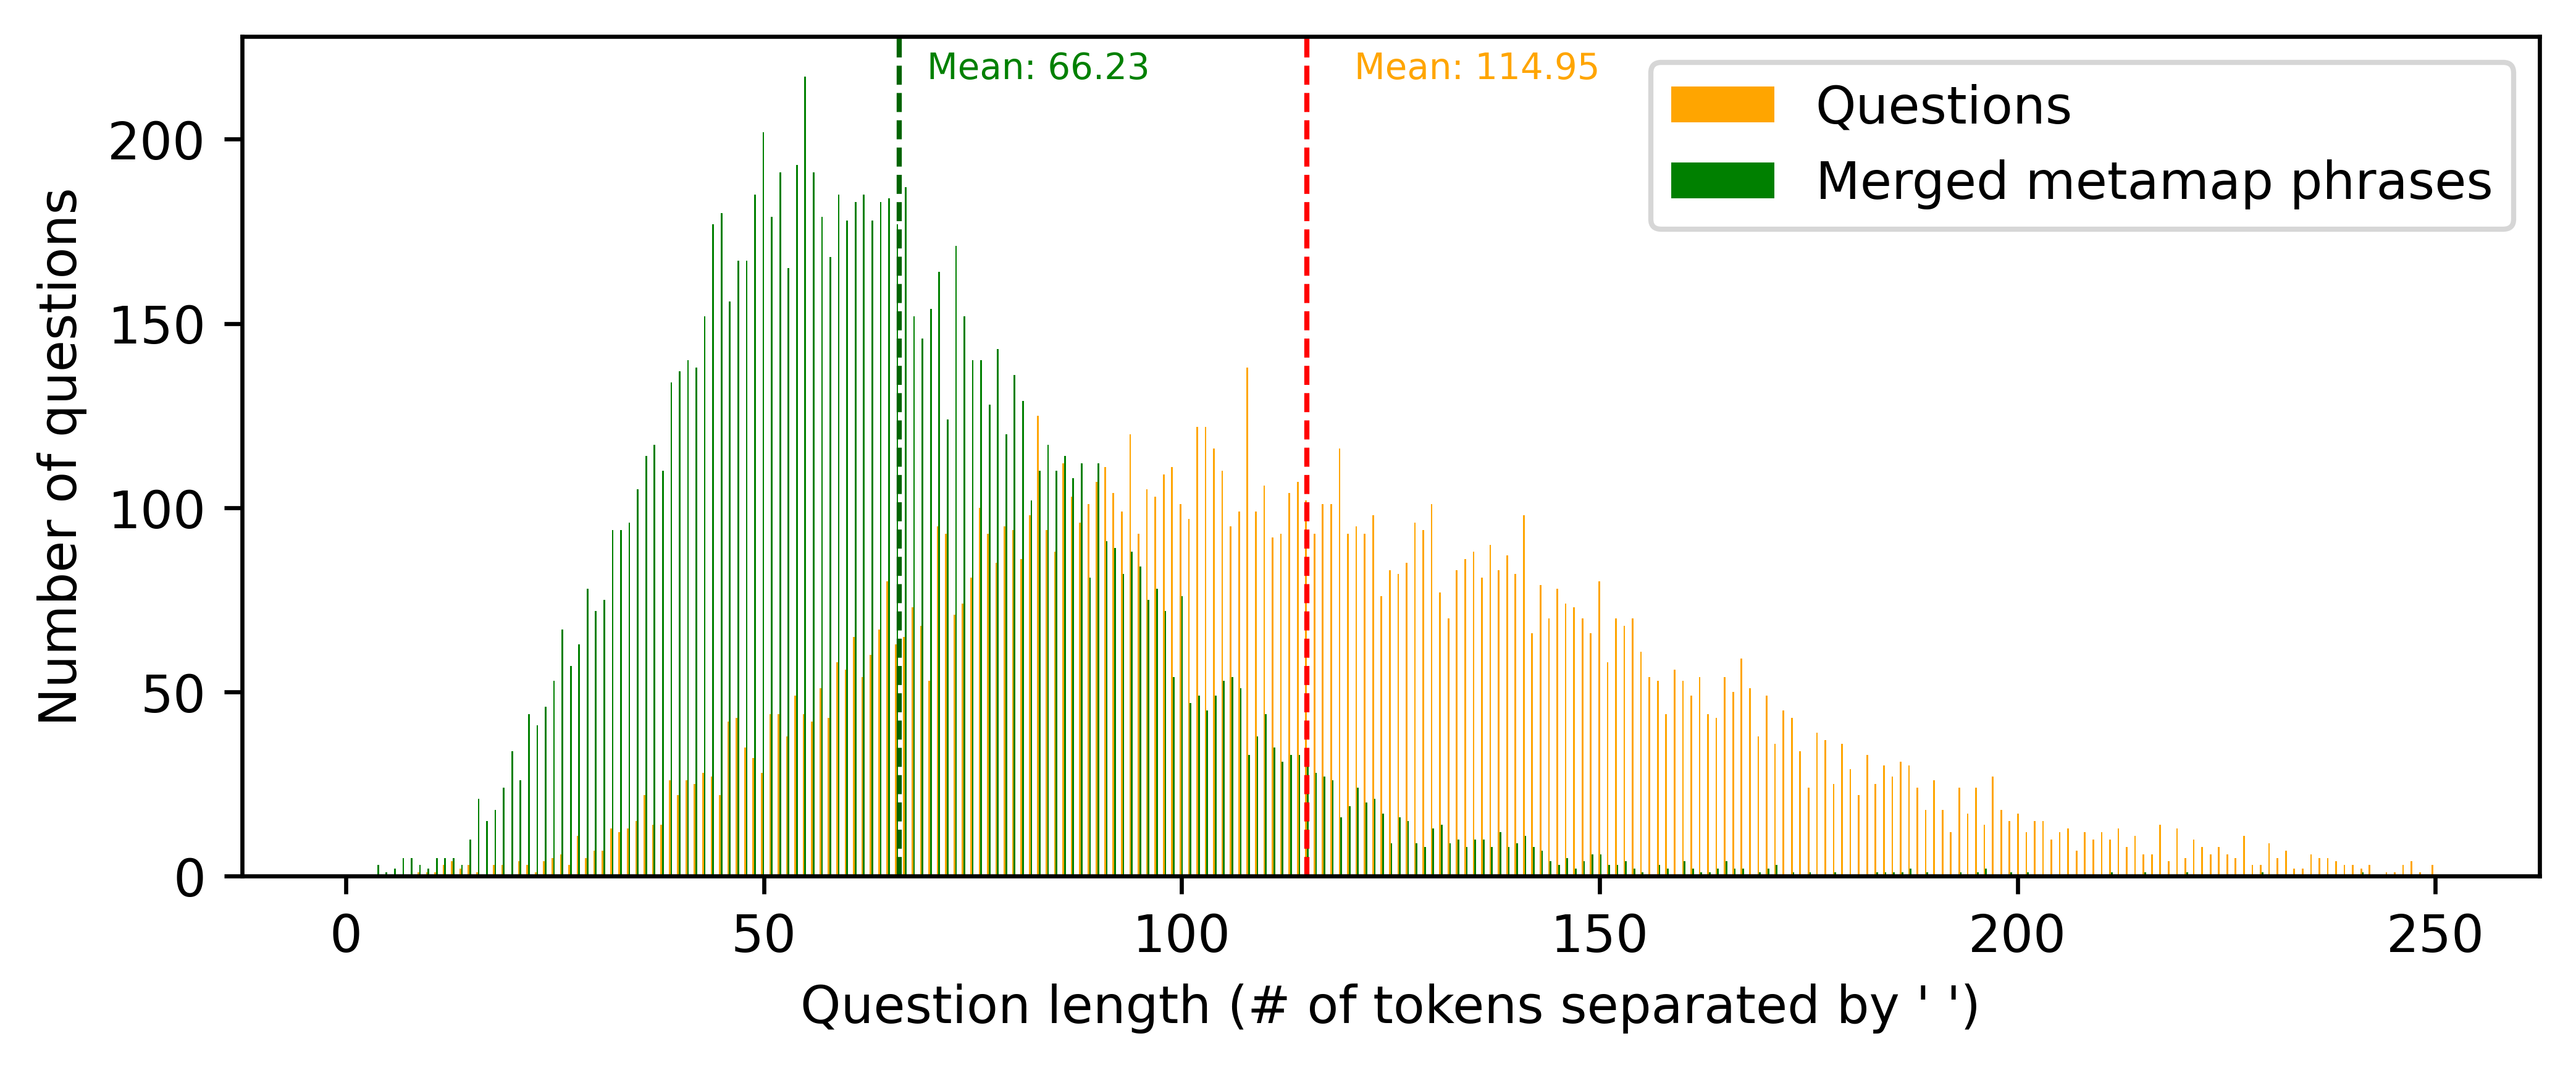

In [8]:
fig = plt.figure(figsize=(8, 3), dpi=600)
file_name = "../../data/medqa/questions/length_comparison.png"
all_q_lengths = [len(x.split(' ')) for x in all_questions]
all_mp_lengths = [len(x.split(' ')) for x in all_metamap_phrases]

longest = max(all_mp_lengths) if max(all_mp_lengths) > max(all_q_lengths) else max(all_q_lengths)
bins = np.linspace(0, 250, 500) 

plt.hist([all_q_lengths, all_mp_lengths],  bins=bins, color=['orange', 'green'], alpha=1,  label=['Questions', 'Merged metamap phrases'])
plt.legend(loc='upper right')

plt.axvline(np.mean(all_q_lengths), color='red', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(all_mp_lengths), color='darkgreen', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(np.mean(all_q_lengths)*1.05, max_ylim*0.95, 'Mean: {:.2f}'.format(np.mean(all_q_lengths)), fontsize="x-small", color="orange")
plt.text(np.mean(all_mp_lengths)*1.05, max_ylim*0.95, 'Mean: {:.2f}'.format(np.mean(all_mp_lengths)), fontsize="x-small", color="green")
plt.xlabel("Question length (# of tokens separated by ' ')")
plt.ylabel("Number of questions")


# plt.gca().set_axis_off()
# plt.margins(0,0)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.savefig(file_name, bbox_inches='tight')
plt.show()

# of words longer than 250 tokens: 44
95th percentile: 190.0


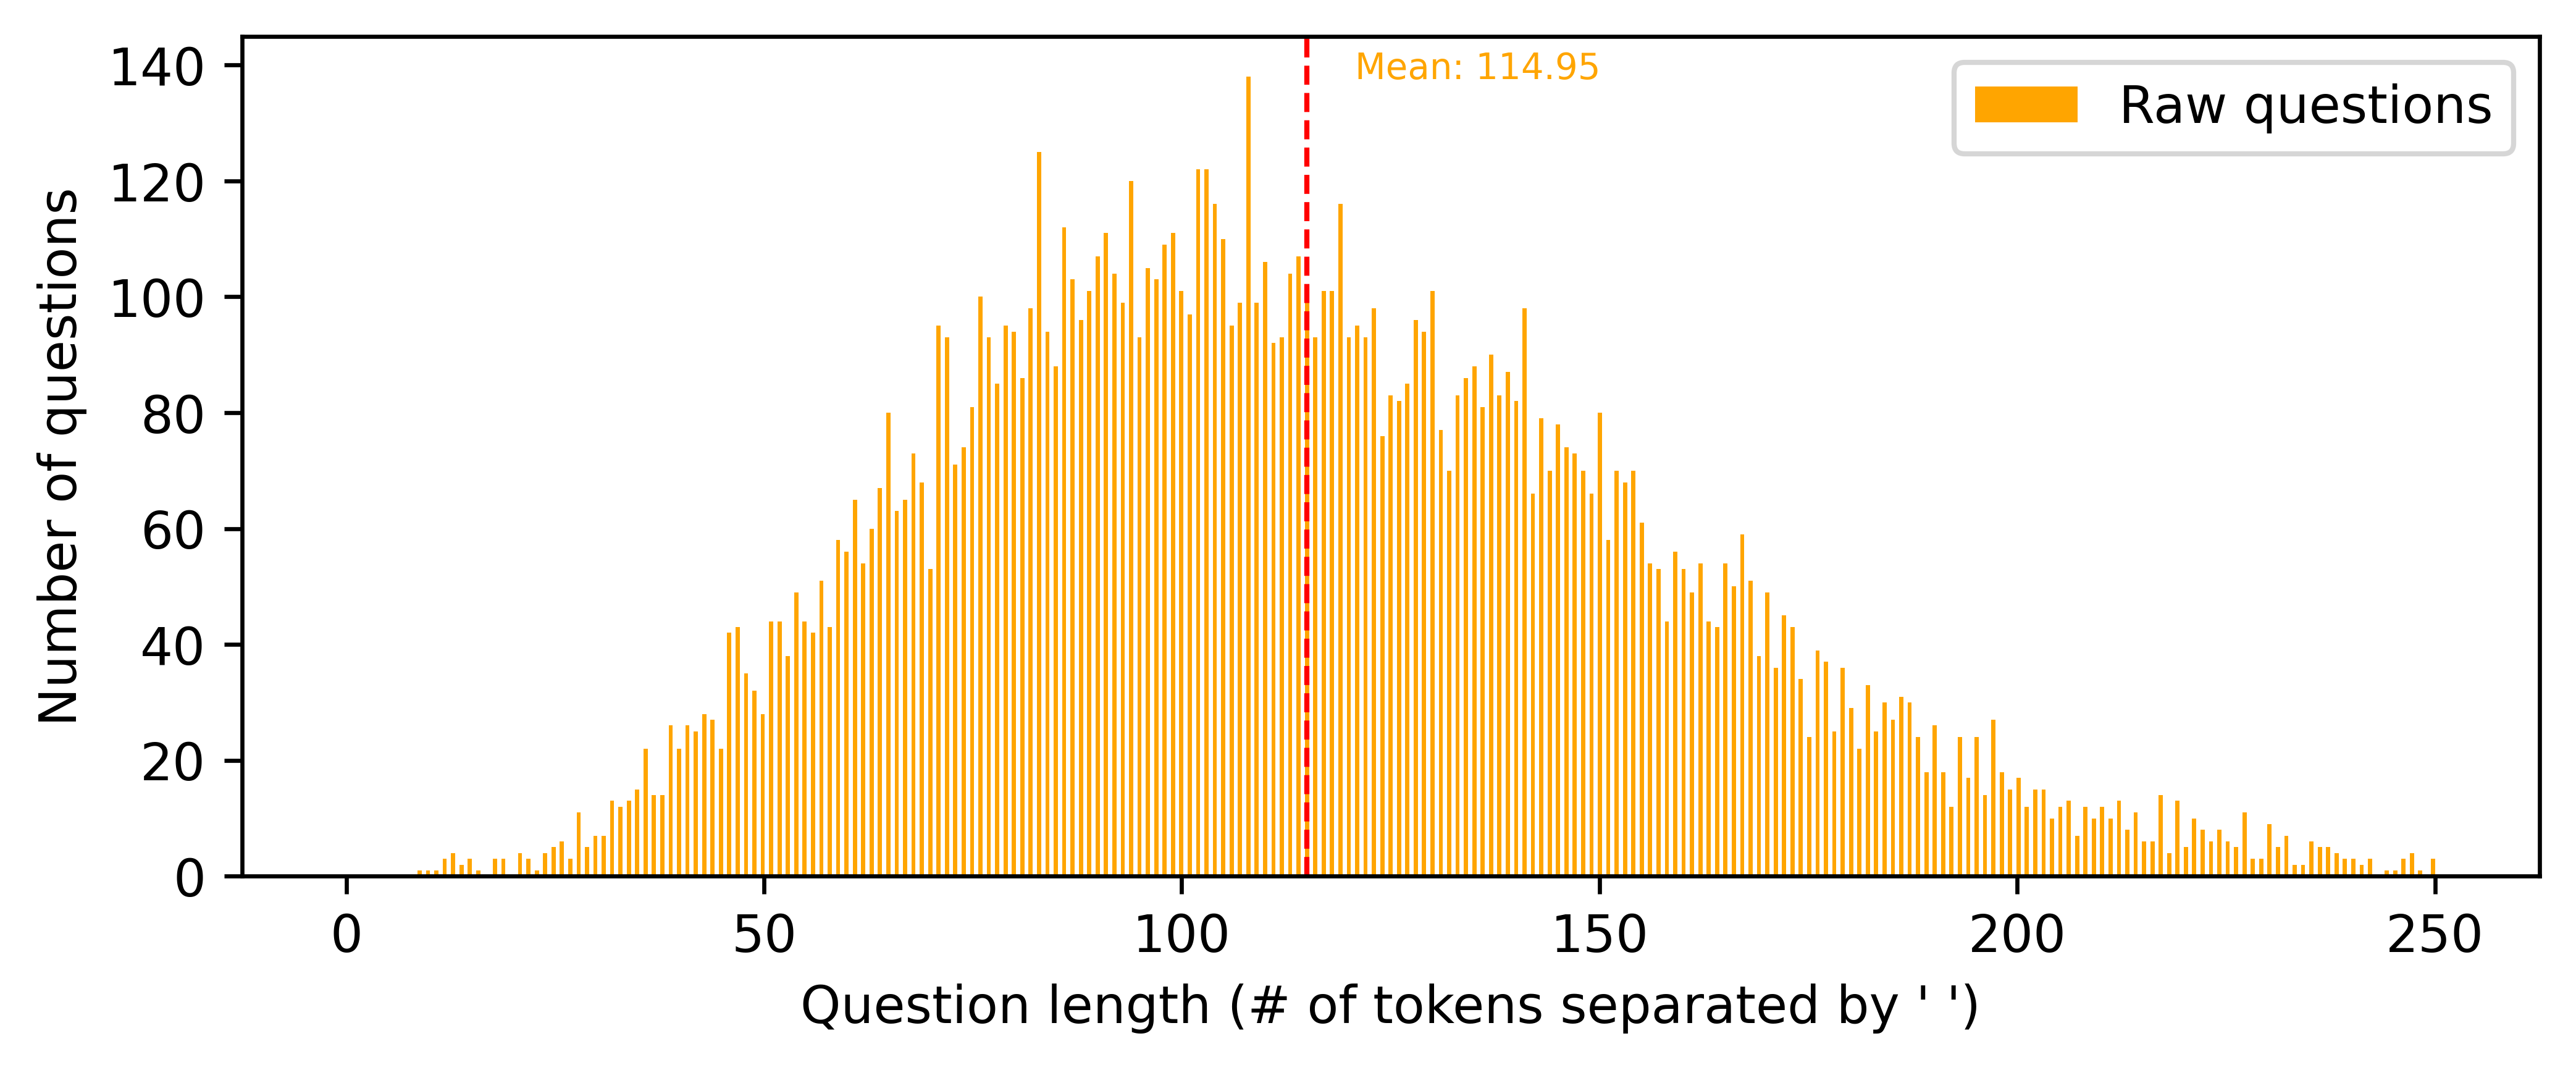

In [9]:
fig = plt.figure(figsize=(8, 3), dpi=600)
file_name = "../../data/medqa/questions/length_questions.png"

all_q_lengths = [len(x.split(' ')) for x in all_questions]
all_mp_lengths = [len(x.split(' ')) for x in all_metamap_phrases]

longest = max(all_mp_lengths) if max(all_mp_lengths) > max(all_q_lengths) else max(all_q_lengths)
longer_than_300 = len([x for x in all_q_lengths if x >250])
print(f"# of words longer than 250 tokens: {longer_than_300}")
print(f"95th percentile: {np.percentile(all_q_lengths, 95)}")

bins = np.linspace(0, 250, 500) 

plt.hist(all_q_lengths,  bins=bins, color='orange', alpha=1, label='Raw questions')
plt.legend(loc='upper right')

plt.axvline(np.mean(all_q_lengths), color='red', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(np.mean(all_q_lengths)*1.05, max_ylim*0.95, 'Mean: {:.2f}'.format(np.mean(all_q_lengths)), fontsize="x-small", color="orange")
plt.xlabel("Question length (# of tokens separated by ' ')")
plt.ylabel("Number of questions")
plt.savefig(file_name, bbox_inches='tight')
plt.show()

# of words longer than 250 tokens: 11
95th percentile: 113.0


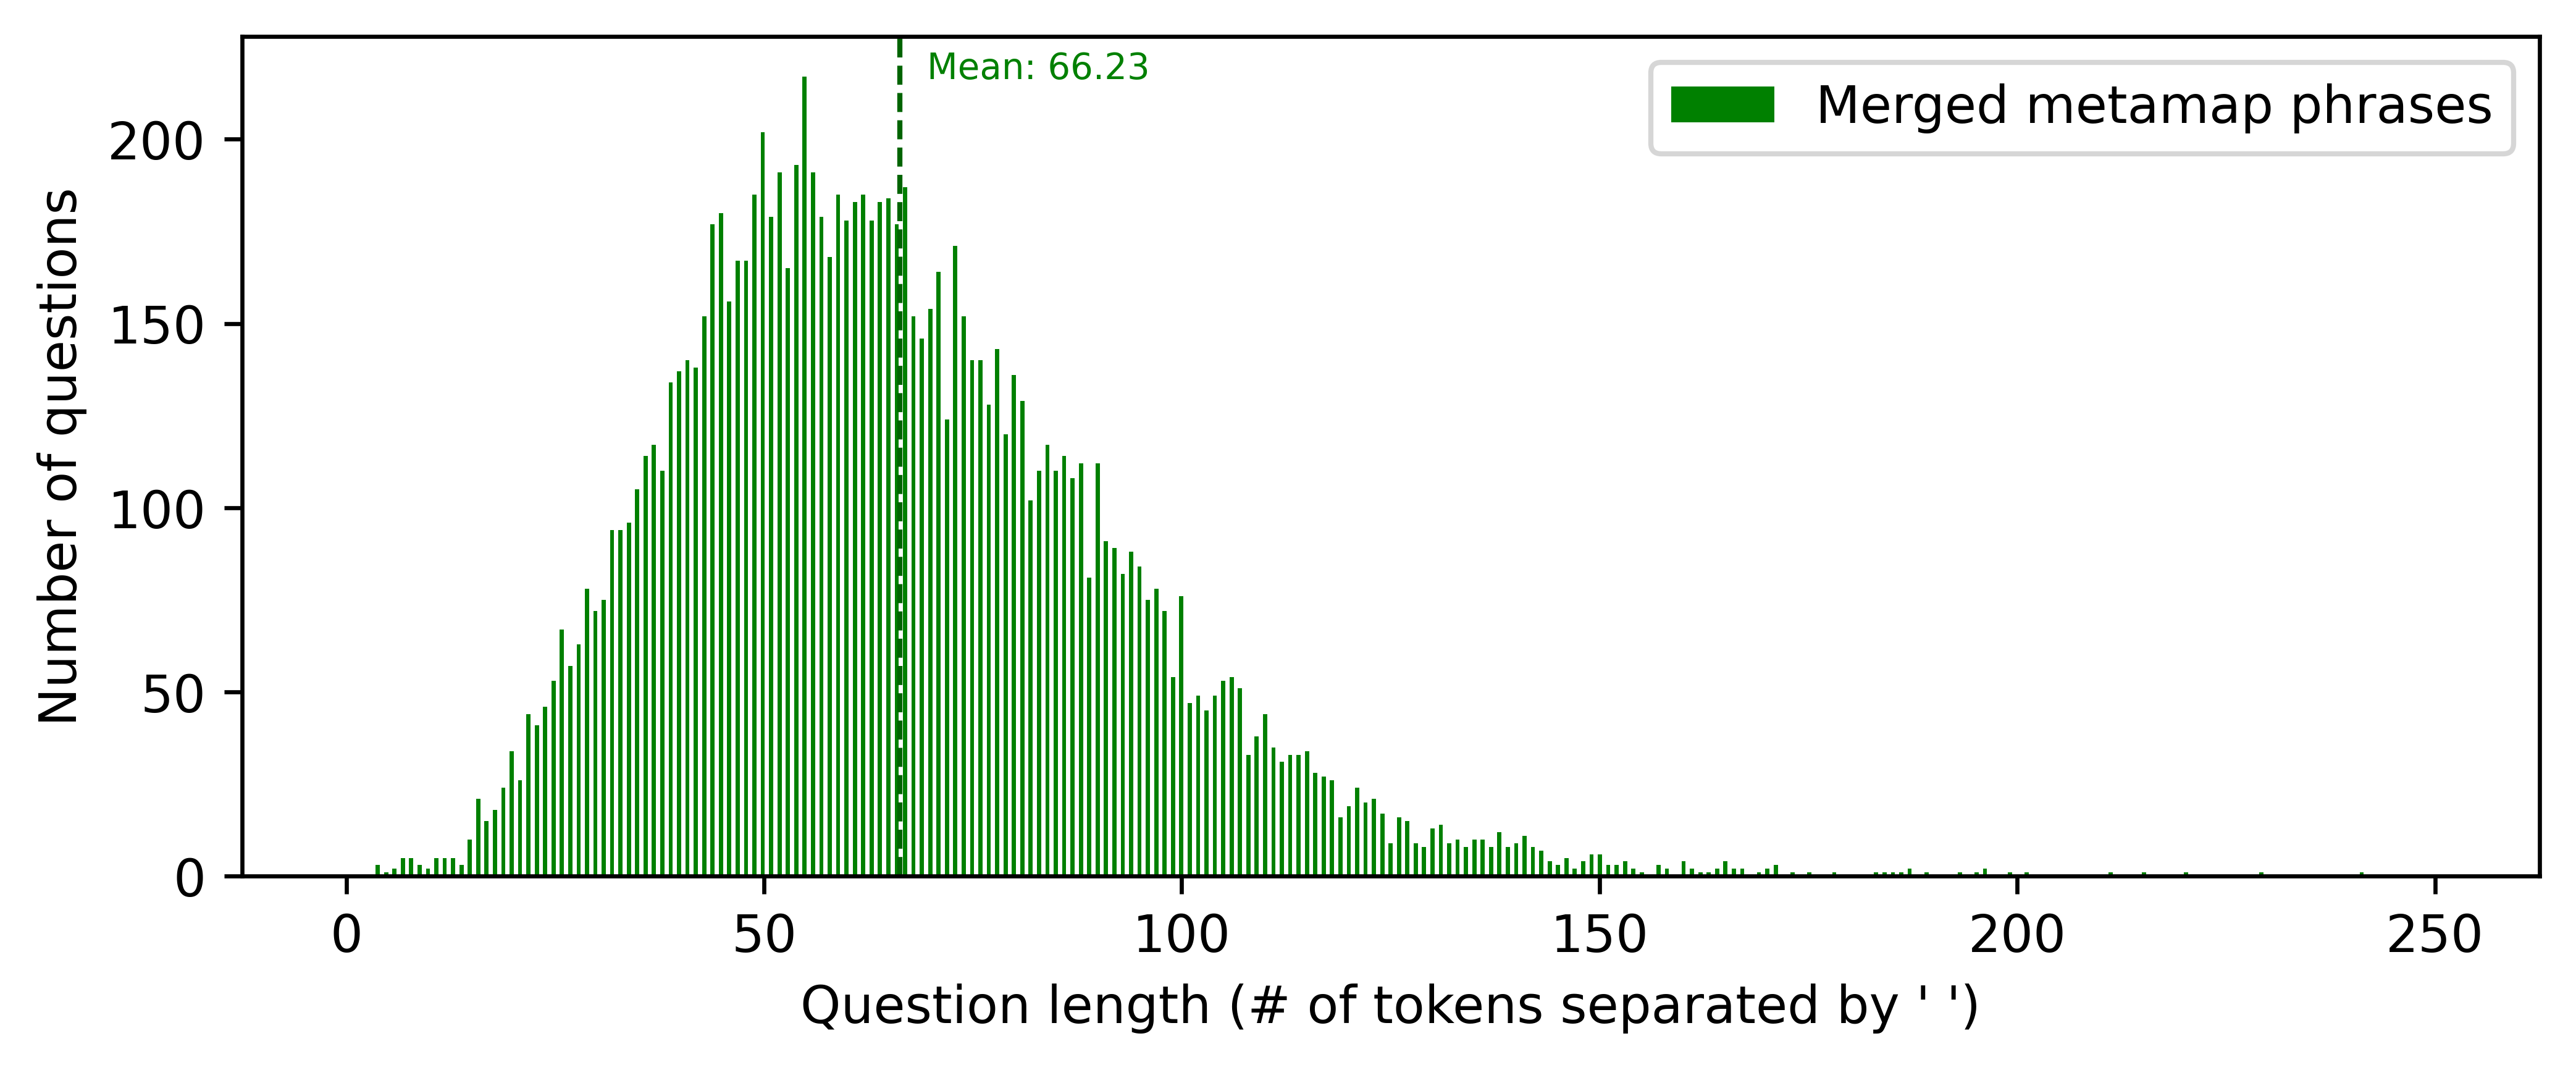

In [10]:
fig = plt.figure(figsize=(8, 3), dpi=600)
file_name = "../../data/medqa/questions/length_metamap.png"

all_q_lengths = [len(x.split(' ')) for x in all_questions]
all_mp_lengths = [len(x.split(' ')) for x in all_metamap_phrases]

longest = max(all_mp_lengths) if max(all_mp_lengths) > max(all_q_lengths) else max(all_q_lengths)
longer_than_300 = len([x for x in all_mp_lengths if x >250])
print(f"# of words longer than 250 tokens: {longer_than_300}")
print(f"95th percentile: {np.percentile(all_mp_lengths, 95)}")
bins = np.linspace(0, 250, 500) 

plt.hist(all_mp_lengths,  bins=bins, color='green', alpha=1,  label='Merged metamap phrases')
plt.legend(loc='upper right')

plt.axvline(np.mean(all_mp_lengths), color='darkgreen', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(np.mean(all_mp_lengths)*1.05, max_ylim*0.95, 'Mean: {:.2f}'.format(np.mean(all_mp_lengths)), fontsize="x-small", color="green")
plt.xlabel("Question length (# of tokens separated by ' ')")
plt.ylabel("Number of questions")
plt.savefig(file_name, bbox_inches='tight')
plt.show()

In [20]:
ms_marco_df = pd.read_csv("../../data/ms-marco-queries-train.tsv", sep='\t')
ms_marco_df.columns = ['q_id', 'question']
all_msmarco_questions = ms_marco_df['question']

# of words longer than 25 tokens: 11079
95th percentile: 11.0


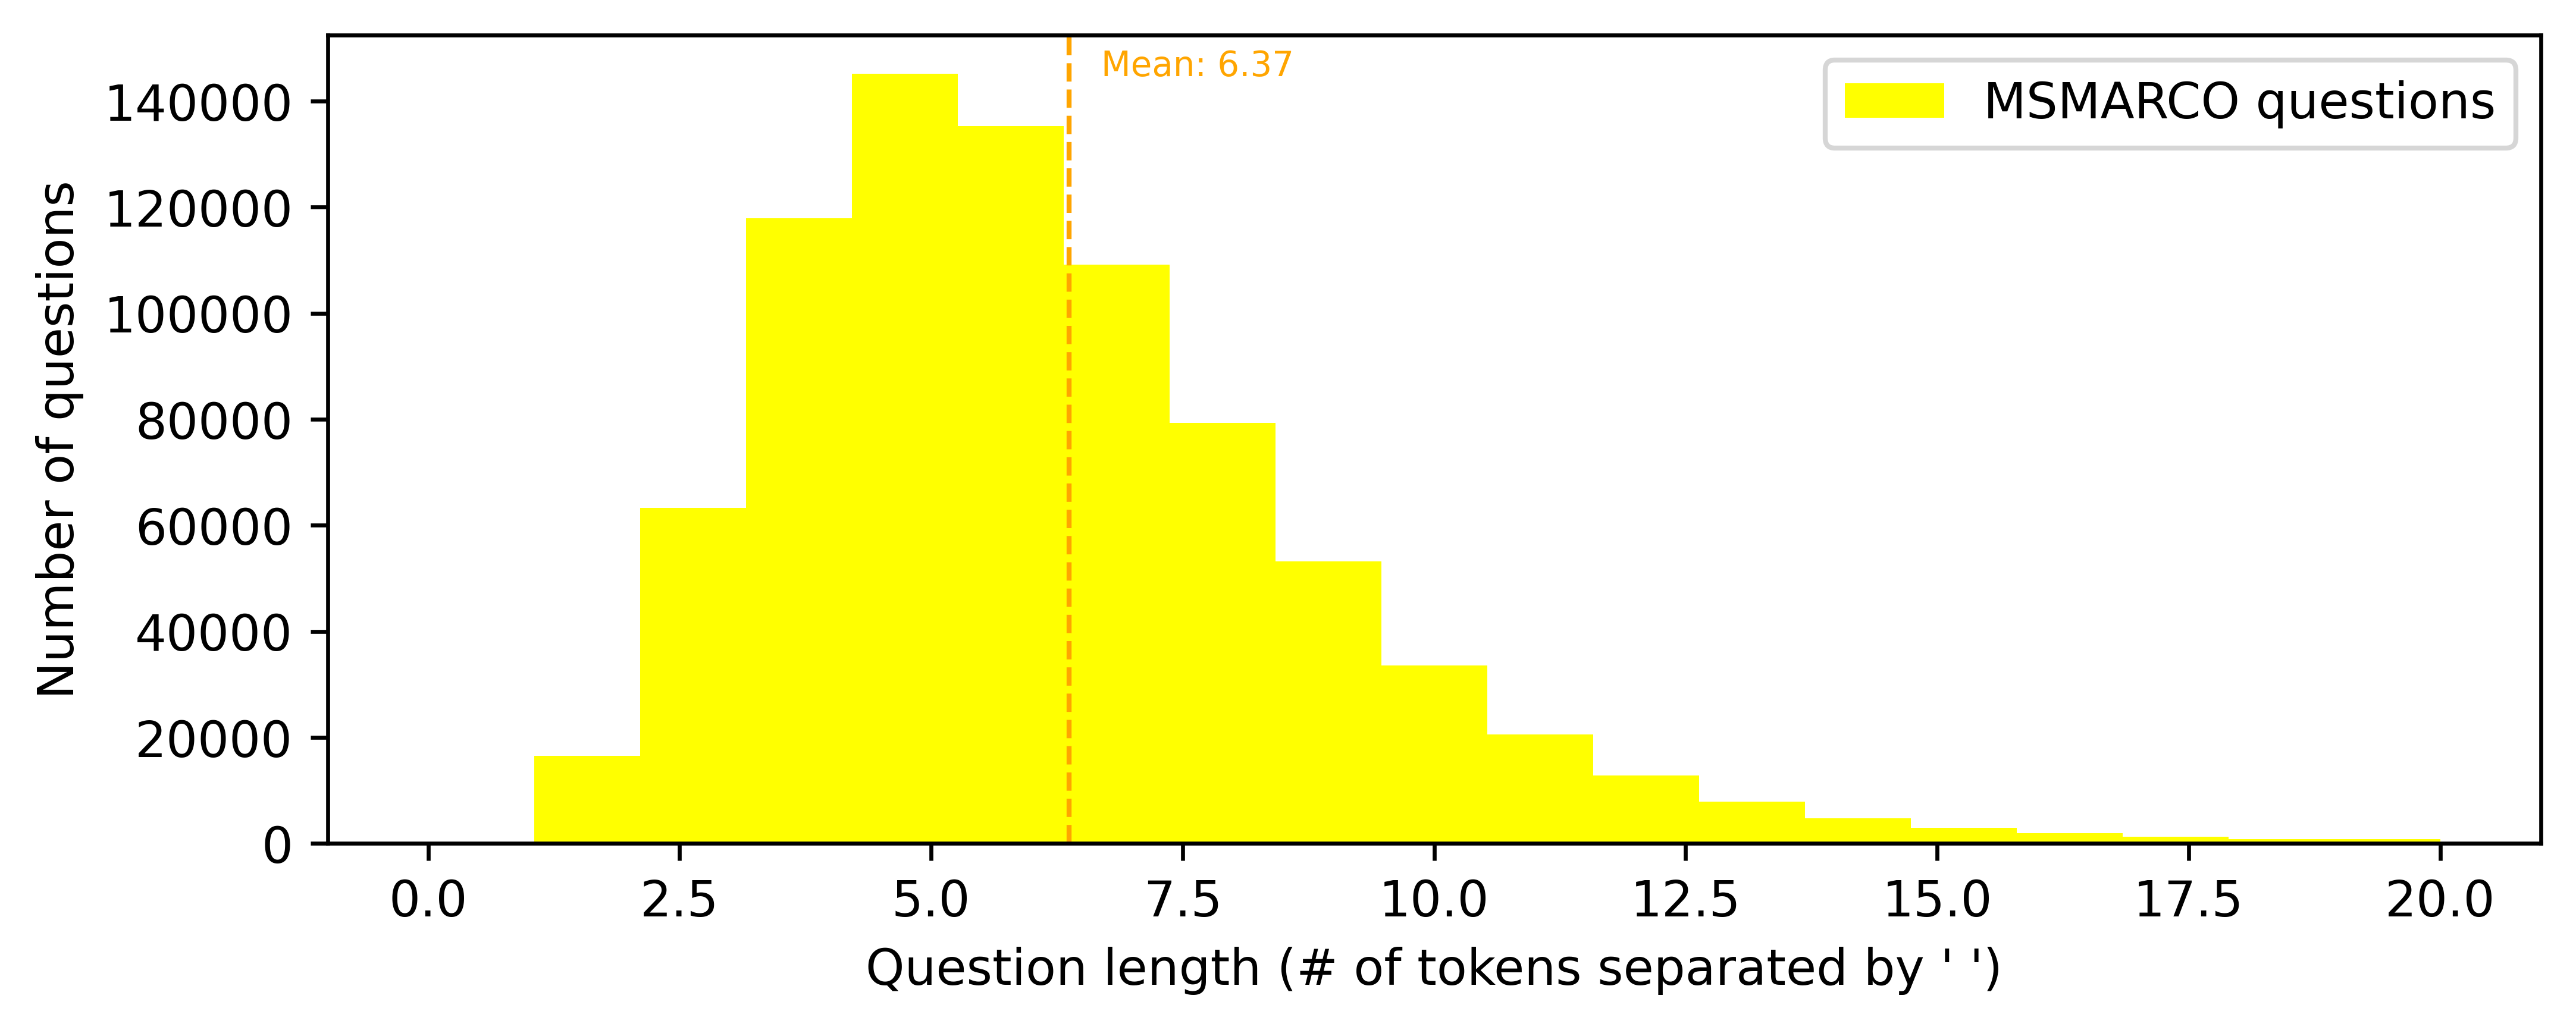

In [33]:
fig = plt.figure(figsize=(8, 3), dpi=600)
file_name = "../../data/medqa/questions/length_msmarco.png"

all_q_lengths = [len(x.split(' ')) for x in all_msmarco_questions]

longest = max(all_q_lengths)
longer_than_25 = len([x for x in all_mp_lengths if x > 25])
print(f"# of words longer than 25 tokens: {longer_than_25}")
print(f"95th percentile: {np.percentile(all_q_lengths, 95)}")
bins = np.linspace(0, 20, 20) 

plt.hist(all_q_lengths,  bins=bins, color='yellow', alpha=1,  label='MSMARCO questions')
plt.legend(loc='upper right')

plt.axvline(np.mean(all_q_lengths), color='orange', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(np.mean(all_q_lengths)*1.05, max_ylim*0.95, 'Mean: {:.2f}'.format(np.mean(all_q_lengths)), fontsize="x-small", color="orange")
plt.xlabel("Question length (# of tokens separated by ' ')")
plt.ylabel("Number of questions")
plt.savefig(file_name, bbox_inches='tight')
plt.show()